In [1]:
import glob
import imageio
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import random
import pickle

In [2]:
DataDir = 'ignore_folder/data'
Categories = ['a4a3','a67e','a447','a440','a4e9','a4a7','a46c','a548']
Categories_fifty = ['a447', 'a440', 'a476', 'a67e', 'ae61', 'a470', 'a448', 'a4e9', 'a6ca', 'b773', 'a8e4', 'a4e8', 'a8c6', 'a4d2', 'a8bd', 'a8ae', 'a4a7', 'a46c', 'a46b', 'a453', 'a454', 'b3bd', 'a5d5', 'a5aa', 'a5bf', 'b54c', 'a56b', 'b0a8', 'a6e6', 'a4e5', 'a4fd', 'bb50', 'a4eb', 'a6a8', 'a6db', 'b16f', 'aaf8', 'a4d1', 'a4bd', 'b6c0', 'a4a3', 'a548', 'a4a4', 'aaf7', 'aaf9', 'aacc', 'a451', 'a45f', 'a5ce', 'a457', 'aa46', 'a46a']
Categories_all = ['a5df', 'a447', 'a440', 'a476', 'a67e', 'ae61', 'a470', 'a448', 'a9d2', 'a44a', 'a5d0', 'a569', 'acdb', 'a8e2', 'a558', 'a4ce', 'a4f1', 'a4e9', 'a6ca', 'b773', 'ab42', 'a8e4', 'a4e8', 'ad78', 'b944', 'a8c6', 'a6d1', 'a977', 'a57e', 'a8a3', 'a4d2', 'a6b3', 'a8ad', 'a740', 'a8bd', 'a8ae', 'a4a7', 'b3a3', 'a46c', 'a464', 'a656', 'a5fe', 'a455', 'a5c1', 'a658', 'b3be', 'a45d', 'a9fa', 'a46b', 'a9ce', 'a453', 'ac46', 'a454', 'b3bd', 'a5c9', 'a650', 'a668', 'a5fd', 'a5d5', 'a5aa', 'a5db', 'a7da', 'a5a6', 'a475', 'a5bf', 'adfb', 'a474', 'a473', 'afe0', 'a8c3', 'a55b', 'bec7', 'b54c', 'a6e7', 'a4ec', 'a4fb', 'a751', 'a56b', 'b0a8', 'a4f4', 'a6e6', 'a4e2', 'a6e8', 'a4e5', 'a4fd', 'bb50', 'ab48', 'a4c0', 'a4eb', 'b0aa', 'a8e0', 'a6a8', 'a6db', 'bb44', 'b16f', 'a8d3', 'a6b9', 'a540', 'a6d5', 'b0ea', 'aaf8', 'a8a7', 'a4d1', 'a4bd', 'a6b8', 'b6c0', 'a4a3', 'a548', 'a4a4', 'aaf7', 'b160', 'a6d3', 'aaf9', 'aacc', 'a86b', 'aa47', 'a467', 'b1d0', 'a451', 'a45f', 'a5ce', 'a457', 'adab', 'aa46', 'a46a']
Categories_selected = []

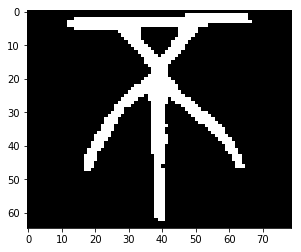

In [3]:
for category in Categories:  # characters
    path = os.path.join(DataDir,category)  # create path to characters
    for img in os.listdir(path):  # iterate over each image
        if 'jinwen' or 'chuxi' in img:
            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
            plt.imshow(img_array, cmap='gray')  # graph it
            plt.show()  # display!
        break  # we just want one for now so break
    break  #...and one more!

In [4]:
img_array.shape

(65, 79)

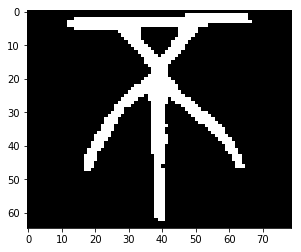

In [5]:
IMG_X = 65
IMG_Y = 79

new_array = cv2.resize(img_array, (IMG_Y, IMG_X)) # after checkning they need to be rearanged
plt.imshow(new_array, cmap='gray')
plt.show()

In [6]:
training_data = []

def create_training_data():
    for category in Categories:
        path = os.path.join(DataDir,category)
        class_num = Categories.index(category)
        for img in os.listdir(path):
            if 'jinwen' or 'chuxi' in img:
                try:
                    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                    new_array = cv2.resize(img_array, (IMG_Y, IMG_X))
                    training_data.append([new_array, class_num])
                except Exception as e:
                    pass

In [7]:
create_training_data()

In [8]:
print(len(training_data))

1965


In [9]:
random.shuffle(training_data)

In [10]:
train_X = []
train_y = []
for features, label in training_data:
    train_X.append(features)
    train_y.append(label)
train_X = np.array(train_X)

In [11]:
train_X.shape

(1965, 65, 79)

In [12]:
pickle_out = open('ignore_folder/train_X.pickle', 'wb')
pickle.dump(train_X, pickle_out)
pickle_out.close()
pickle_out = open('ignore_folder/train_y.pickle', 'wb')
pickle.dump(train_y, pickle_out)
pickle_out.close()